<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [73]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [74]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [75]:
# текст запроса
query_3_1 = f'''
    select count(*)
    from vacancies
'''

In [76]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

/tmp/ipykernel_340114/1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [77]:
# текст запроса
query_3_2 = f'''
    select count(*)
    from employers
'''

In [78]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

/tmp/ipykernel_340114/3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [79]:
# текст запроса
query_3_3 = f'''
    select count(*)
    from areas
'''

In [80]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

/tmp/ipykernel_340114/928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [81]:
# текст запроса
query_3_4 = f'''
    select count(*)
    from industries
'''

In [82]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

/tmp/ipykernel_340114/2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

# выводы по предварительному анализу данных
Число вакансий примерно в 2 раза больше, чем работадателей. У нас имеется 1362 региона/города и 294 сферы деятельности. Данные о вакансиях можно хорошо сгрупировать по региону, так как их значительно меньше, а также другим категориям, которые представлены в таблице. Работадателей можно сгруппировать по региону и сфере деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

select a.name, count(v.id) as cnt
from vacancies v, areas a
where v.area_id=a.id
group by v.area_id, a.name
order by 2 desc
limit 5

In [83]:
# текст запроса
query_4_1 = f'''
    select a.name, top_area.cnt
    from areas a,
    (select count(v.id) as cnt, v.area_id
    from vacancies v
    group by v.area_id
    order by 1 desc
    limit 5) as top_area
    where top_area.area_id=a.id
    order by 2 desc
'''

In [84]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

/tmp/ipykernel_340114/2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [85]:
# текст запроса
query_4_2 = f'''
    select count(*) cnt
    from vacancies
    where salary_from is not null or salary_to is not null 
'''

In [86]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

/tmp/ipykernel_340114/970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [87]:
# текст запроса
query_4_3 = f'''
    select 
        round(avg(salary_from)) avg_salary_from, 
        round(avg(salary_to)) avg_salary_to
    from vacancies
    where salary_from is not null 
       or salary_to is not null 
'''

In [88]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

/tmp/ipykernel_340114/2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [89]:
# текст запроса
query_4_4 = f'''
    select 
        schedule,
        employment,
        count(*) as cnt_sch_emp
    from vacancies
    group by schedule, employment
    order by 3 desc
    offset 1 limit 1
'''

In [90]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

/tmp/ipykernel_340114/2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt_sch_emp
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [91]:
# текст запроса
query_4_5 = f'''
    select 
        experience
    from vacancies
    group by experience
    order by count(*) 
'''

In [92]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

/tmp/ipykernel_340114/2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

# выводы по детальному анализу вакансий
В топ-5 городов по количеству вакансий входят Москва, Питер, Минск, Новосибирск, Алмата. При этом только у половины вакансий заполнена графа о нижней или верхней ЗП. Чаще всего требуют наличие опыта 1-3 лет, меньше всего от 6 лет. На втором месте по распространенности у нас удаленная работа с полной занятостью. Средняя нижняя ЗП 71тыс. руб, средняя верхняя 110 тыс руб.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [93]:
# текст запроса
query_5_1 = f'''
    select 
        e.name
    from vacancies v,
        employers e
    where e.id=v.employer_id    
    group by v.employer_id, e.name
    order by count(*) desc
    limit 5     
'''

In [94]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

/tmp/ipykernel_340114/3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,name
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [95]:
# текст запроса
query_5_2 = f'''
    select 
        a.name,
        count(v.id) as cnt_vac,
        count(e.id) as cnt_emp
    from areas a 
        left join employers e on a.id=e.area
        left join vacancies v on a.id=v.area_id
    group by a.id
    having count(v.id)=0
    order by 3 desc
    limit 1     
'''

In [96]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

/tmp/ipykernel_340114/2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,name,cnt_vac,cnt_emp
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [97]:
# текст запроса
query_5_3 = f'''
    select 
        e.id,
        count(distinct v.area_id) as cnt_area
    from employers e 
        left join vacancies v on e.id=v.employer_id
    group by e.id
    order by 2 desc
    limit 1         
'''

In [98]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

/tmp/ipykernel_340114/201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,id,cnt_area
0,1740,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [99]:
# текст запроса
query_5_4 = f'''
    select 
        count(e.id) as cnt_emp_not_ind
    from employers e
    left join employers_industries emp_ind on e.id=emp_ind.employer_id
    where emp_ind.industry_id is null          
'''

In [100]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

/tmp/ipykernel_340114/3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,cnt_emp_not_ind
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [101]:
# текст запроса
query_5_5 = f'''
    select 
        e.name
    from employers e
    left join employers_industries emp_ind on e.id=emp_ind.employer_id
    group by e.id
    having count(emp_ind.industry_id)=4
    order by 1
    offset 2 
    limit 1          
'''

In [102]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

/tmp/ipykernel_340114/388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [103]:
# текст запроса
query_5_6 = f'''
    select 
        count(e.id) as cnt
    from employers e
    join employers_industries emp_ind on e.id=emp_ind.employer_id
    join industries i on emp_ind.industry_id=i.id
    where i.name = 'Разработка программного обеспечения'          
'''

In [104]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

/tmp/ipykernel_340114/821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [105]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tables = pd.read_html(url)
city_df = tables[1] #get first table from wiki
#display(city_df)
city_list = list(city_df['Город'])
city_list[13] = 'Воронеж'
city_list = tuple(city_list)
print(city_list)
print(len(city_list))

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
16


In [106]:
# текст запроса
query_5_7 = f'''
    select 
        a.name,
        count(*) as cnt
    from employers e
    join vacancies v on e.id=v.employer_id
    join areas a on a.id=v.area_id
    where e.name = 'Яндекс' 
        and a.name in {city_list}
    group by a.name
    
    union all
    
    select 
        'total', 
        count(*)
    from employers e
    join vacancies v on e.id=v.employer_id 
        and e.name = 'Яндекс'  
    join areas a on a.id=v.area_id
        and a.name in {city_list}
    
    order by 2              
'''

In [107]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

/tmp/ipykernel_340114/1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# выводы по анализу работодателей
* По количеству вакансий среди работодателей топ5 это Яндекс, Ростелеком,Тинькофф, СБЕР, Газпром нефть. 
* Среди регионов, в которых нет вакансий, в России наибольшее количество работодателей.
* Работодатель с номером 1740 больше всех присутствует в разных регионах (по заявкам).
* Сфера деятельности не указанна у трети работодателей.
* 2ГИС находится на третьем месте среди компаний с 4 видами деятельности.
* У восьмой части работодателей указана сфера деятельности 'Разработка программного обеспечения'. 
* Яндекс имеет 485 вакансий в городах-милионниках.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [108]:
# текст запроса
query_6_1 = f'''
        select count( name) cnt
        from vacancies
        where lower(name) like '%data%' or lower(name) like '%данн%'
              
'''

In [109]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

/tmp/ipykernel_340114/366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [110]:
# текст запроса
query_6_2 = f'''
        select count(*) cnt
        from vacancies
        where (lower(name) like '%data%scientist%' 
                or lower(name) like '%data%science%'
                or lower(name) like '%исследователь%данных%'
                or lower(name) like '%ml%'
                or lower(name) like '%machine%learning%'
                or lower(name) like '%машинн%обучен%')
                and
                (lower(name) like '%junior%'
                or lower(experience) like '%нет опыта%'
                or lower(employment) like '%стажировка%')
                AND 
                upper(name) NOT LIKE '%HTML%'
              
'''

In [111]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

/tmp/ipykernel_340114/2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [112]:
# текст запроса
query_6_3 = f'''
        select count(*) cnt
        from vacancies
        where (lower(name) like '%data%scientist%' 
            or lower(name) like '%data%science%'
            or lower(name) like '%исследователь%данных%'
            or name like '%ML%'
            or lower(name) like '%machine%learning%'
            or lower(name) like '%машинн%обучен%')
            and 
            (lower(name) not like '%html%')
            AND
            (lower(key_skills) LIKE '%sql%'
            or lower(key_skills) like '%postgres%')              
'''

In [113]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

/tmp/ipykernel_340114/3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [114]:
# текст запроса
query_6_4 = f'''
        select count(*) cnt
        from vacancies
        where (lower(name) like '%data%scientist%' 
            or lower(name) like '%data%science%'
            or lower(name) like '%исследователь%данных%'
            or name like '%ML%'
            or lower(name) like '%machine%learning%'
            or lower(name) like '%машинн%обучен%')
            and 
            (lower(name) not like '%html%')
            AND
            (lower(key_skills) LIKE '%python%')             
'''

In [115]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

/tmp/ipykernel_340114/4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [116]:
# текст запроса
query_6_5 = f'''
        select round(AVG(LENGTH(key_skills) - LENGTH(replace(key_skills, CHR(9), '')) + 1), 2)
        from vacancies
        where (lower(name) like '%data%scientist%' 
            or lower(name) like '%data%science%'
            or lower(name) like '%исследователь%данных%'
            or name like '%ML%'
            or lower(name) like '%machine%learning%'
            or lower(name) like '%машинн%обучен%')
            and 
            (lower(name) not like '%html%')
               
'''

In [117]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

/tmp/ipykernel_340114/3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [118]:
# текст запроса
query_6_6 = f'''
        select 
            experience,
            round(AVG (case when salary_from IS NOT NULL and salary_to IS NOT NULL then (salary_from+salary_to)/2
                        when salary_from IS NULL then salary_to
                        else salary_from end)) as avg_salary
        from vacancies
        where (lower(name) like '%data%scientist%' 
            or lower(name) like '%data%science%'
            or lower(name) like '%исследователь%данных%'
            or name like '%ML%'
            or lower(name) like '%machine%learning%'
            or lower(name) like '%машинн%обучен%')
            and 
            (lower(name) not like '%html%')
        group by experience        
'''

In [119]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

/tmp/ipykernel_340114/519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
* Вакансий имеющих отношение к данным 1771 из 49197, что около 3,6%
* Вакансий для начаниющего DS 51
* Количество вакансий для DS, где требуются знания sql или postgres, 201
* Количество вакансий для DS, где требуются знания python, 351
* В среднем требуется 6-7 навыков для DS
* DS без опыта работы может рассчитывать на 75тыс. руб, 1-3 лет на 140тыс. руб, 3-6 лет на 243 тыс. руб. Если опыт от 6 лет, то ЗП неизвестна.


# Общий вывод по проекту

In [120]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
# текст запроса
# количество вакансий в городах-милионниках
query_7_1 = f'''
        SELECT
            a.name,
            COUNT(v.id) AS cnt
        FROM vacancies AS v
        JOIN employers AS e ON e.id = v.employer_id
        JOIN areas AS a ON a.id = v.area_id
                        AND a.name IN {city_list}
        GROUP BY a.name
        
        UNION ALL

        SELECT  
            'Total',
            COUNT(*)
        FROM vacancies AS vv
        JOIN employers AS ee ON ee.id = vv.employer_id
        JOIN areas AS aa ON aa.id = vv.area_id
                        AND aa.name IN {city_list}

        order by 2        
'''

In [121]:
# результат запроса
df = pd.read_sql_query(query_7_1, connection)
df

/tmp/ipykernel_340114/2931715827.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_1, connection)


,name,cnt
0,Волгоград,456
1,Омск,617
2,Уфа,767
3,Пермь,771
4,Челябинск,786
5,Красноярск,847
6,Воронеж,1063
7,Ростов-на-Дону,1131
8,Самара,1144
9,Краснодар,1301


In [122]:
# текст запроса
# топ20 популярных вакансий
query_7_2 = f'''
        select name, count(*) cnt
        from vacancies
        group by name
        order by 2 desc
        limit 20       
'''

In [123]:
df = pd.read_sql_query(query_7_2, connection)
display(df)
print('Top20 vacancies ', sum(df['cnt']))


/tmp/ipykernel_340114/1903258259.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_2, connection)


,name,cnt
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


Top20 vacancies  7519


In [124]:
# текст запроса
# смотрим профессии, где больше 40 заявок
query_7_3 = f'''
        select name, count(*) cnt
        from vacancies
        group by name
        having count(*) > 40
        order by 2 
              
'''

In [125]:
# результат запроса
df = pd.read_sql_query(query_7_3, connection)


/tmp/ipykernel_340114/866743097.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_3, connection)


<AxesSubplot: title={'center': 'График кол-ва вакансий'}, xlabel='count', ylabel='vacancies'>

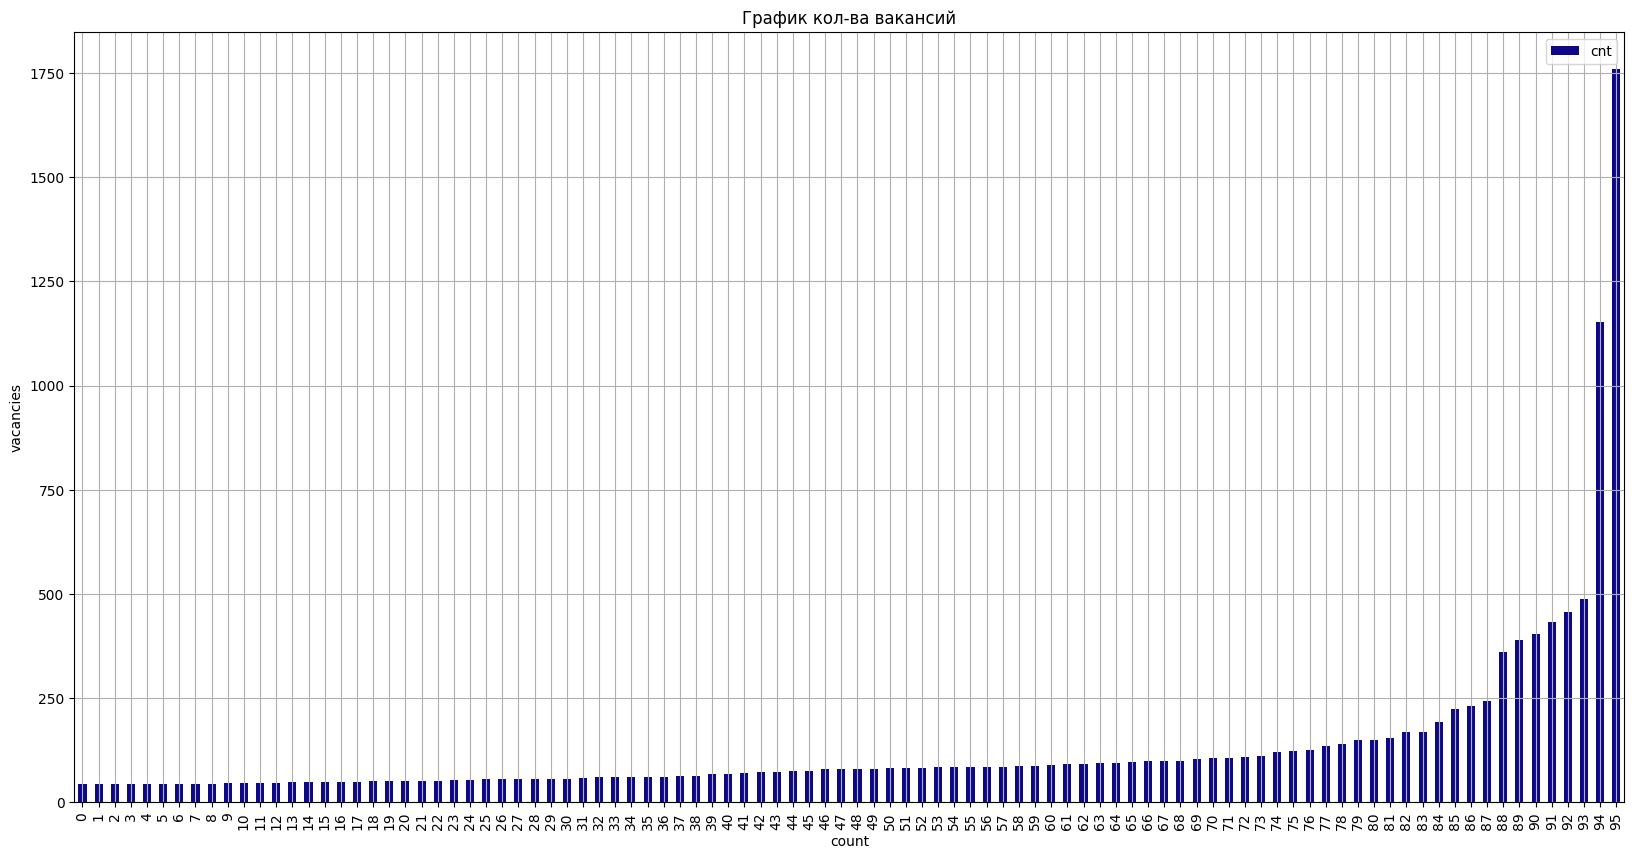

In [126]:
df.plot(
    kind='bar',
    grid=True,
    figsize=(20, 10),
    colormap='plasma',
    xlabel='count',
    ylabel='vacancies',
    title='График кол-ва вакансий'
)

In [127]:
# смотрим количество вакансий для DS в городах-милионниках
query_7_4 = f'''
        SELECT
            a.name,
            COUNT(v.id) AS cnt
        FROM vacancies AS v
        JOIN employers AS e ON e.id = v.employer_id
        JOIN areas AS a ON a.id = v.area_id
                        AND a.name IN {city_list}
        where (lower(v.name) like '%data%scientist%' 
            or lower(v.name) like '%data%science%'
            or lower(v.name) like '%исследователь%данных%'
            or v.name like '%ML%'
            or lower(v.name) like '%machine%learning%'
            or lower(v.name) like '%машинн%обучен%')
            and 
            (lower(v.name) not like '%html%')
        GROUP BY a.name
        
        UNION ALL

        SELECT  
            'Total',
            COUNT(*)
        FROM vacancies AS v
        JOIN employers AS ee ON ee.id = v.employer_id
        JOIN areas AS aa ON aa.id = v.area_id
                        AND aa.name IN {city_list}
        where (lower(v.name) like '%data%scientist%' 
            or lower(v.name) like '%data%science%'
            or lower(v.name) like '%исследователь%данных%'
            or v.name like '%ML%'
            or lower(v.name) like '%machine%learning%'
            or lower(v.name) like '%машинн%обучен%')
            and 
            (lower(v.name) not like '%html%')
            
        order by 2        
'''

In [128]:
# результат запроса
df = pd.read_sql_query(query_7_4, connection)
df

/tmp/ipykernel_340114/2720534386.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_4, connection)


,name,cnt
0,Красноярск,1
1,Волгоград,1
2,Челябинск,1
3,Воронеж,2
4,Уфа,2
5,Омск,3
6,Пермь,5
7,Самара,5
8,Ростов-на-Дону,6
9,Краснодар,6


In [129]:
# текст запроса
# топ20 вакансий для DS
query_7_5 = f'''
        select v.name, count(*) cnt
        from vacancies v
        where (lower(v.name) like '%data%scientist%' 
            or lower(v.name) like '%data%science%'
            or lower(v.name) like '%исследователь%данных%'
            or v.name like '%ML%'
            or lower(v.name) like '%machine%learning%'
            or lower(v.name) like '%машинн%обучен%')
            and 
            (lower(v.name) not like '%html%')
        group by v.name
        order by 2 desc
        limit 20       
'''

In [130]:
df = pd.read_sql_query(query_7_5, connection)
display(df)
print('Top20 vacancies DS', sum(df['cnt']))


/tmp/ipykernel_340114/1311846408.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_5, connection)


,name,cnt
0,Data Scientist,55
1,Senior Data Scientist,21
2,C++ разработчик (QML),10
3,Junior Data Scientist (Валидация скоринговых м...,9
4,ML Engineer/ Data Scientist (WAF),9
5,Data scientist,8
6,Middle Data Scientist,8
7,Архитектор решений с опытом в Tiny ML,6
8,Machine Learning Engineer,6
9,Python-разработчик в команду Data Science,5


Top20 vacancies DS 171


In [131]:
connection.close()

# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
Обобщая имеем следующие, половина заявок приходится на города-милионники. При этом топ20 вакансий по количеству заявок относится к сфере IT, самые большие показатели у "Системный администратор" и "Программист 1С", неплохие показатели и у "DS". Также можно отметить, что по графику количество вакансий плавно возрастает, но как это приблизительный график, так как из топ20(любая таблица) можно было заметить, что некоторые вакансии имеют дубликаты и считаются разными, когда это не так. Касаемо вакансий, которые имеют отношение к данным, им принадлежит ~4%, что говорит о популярности направления. У DS в среднем требуется 6-7 навыков. Чаще всего требуется наличие опыта 1-3 лет, а средняя ЗП 71-110 тыс. руб. Больше свего заявок от Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть - крупные игроки рынка. Можно также заметить, что не хватает данных о зарплате, например у DS с опытом от 6 лет ЗП не известна.

По поводу продолжения исследования, нужно разобраться с дубликатами(трудная задача, так как названия очень похожи), сократить количество пропусков в данных(ЗП, может быть еще что-то). Тогда можно заново оценить топ популярных профессий, посмотреть в каких городах они расспологаются и сколько платят в зависимости от опыта. Также можно оценить в каких городах больше всего требуются высококвалифицированные кадры, потому что там должны находиться сильные "игроки-компании", а где больше набирают "молодых" специалистов. Можно добавить пункт о сфере деятельности в этот анализ, чтобы лучше понимать специфику рынка. Дальше можно поанализировать отдельные направления (DS и другие), если мы хотим понять, что происходит в конкретной сфере. Посмотреть какие навыки популярны, как зависит ЗП от графика работы и занятости и другое 

    

In [7]:
import numpy as np
np.random.seed(100)
print(np.random.randint(10, size=3))
# [8 8 3]
print(np.random.randint(10, size=3))
# [7 7 0]
print(np.random.randint(10, size=3))
# [4 2 5]

[8 8 3]
[7 7 0]
[4 2 5]


In [17]:
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")

three = one[::-1]

In [26]:
my_dict = {1: 3, "Vera": 6, "Sam": 2}
for key, value in my_dict.items():
    print(key, value)

1 3
Vera 6
Sam 2


In [28]:
s = "lsdfn ldsfl dlsfk"
s[:-1]

'lsdfn ldsfl dlsf'

In [32]:
# Введите свое решение ниже
def apply_discounts(products, stocks):
    for name, percent in stocks.items():
        if name in products.keys():
            products[name] = round(products[name] - products[name]*float(percent[:-1])/100, 2) 
    
    return products    

products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Oranges (packaged)': '15%', 'Boiled sausage': '10%', 'Candy (Rotfront)': '50%', 'Diapers': '10%'}

print(apply_discounts(products, stocks))

{'Oranges (packaged)': 97.74, 'Candy (Rotfront)': 140.0, 'Boiled sausage': 179.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}


In [31]:
for name, percent in stocks.items():
    print(products[name])
    

97.74
179.99
140.0


KeyError: 'Diapers'